<a href="https://colab.research.google.com/github/ssreeramj/ml-algos-from-scratch/blob/main/linear_regression_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

from sklearn.datasets import make_regression

In [162]:
# prompt: create a simple regression dataset using make_regression
X, y, actual_coeffs = make_regression(n_samples=1000, n_features=1, noise=10, bias=10, coef=True)

print(f"{X.shape=} {y.shape=}")
actual_coeffs

X.shape=(1000, 1) y.shape=(1000,)


array(38.2062643)

In [163]:
class LinearRegression():
    def __init__(self, n_iters=100, alpha=0.001, threshold=1e-6):
        self.n_iters = n_iters
        self.alpha = alpha
        self.errors = []
        self.threshold = threshold

    def _calculate_derivative(self, X, y):
        y_preds = np.dot(X, self.coeffs)

        derivative = -2/X.shape[0] * (np.dot(X.T, y_preds - y))

        return derivative


    def fit(self, X, y):
        N, n_vars = X.shape
        self.coeffs = np.random.randn(n_vars, 1)
        y = y.reshape(-1, 1)

        for iter in range(self.n_iters):
            y_pred = np.dot(X, self.coeffs)
            mse = np.square(np.subtract(y, y_pred)).mean()
            self.errors.append(mse)
            # derivative = self._calculate_derivative(X, y)
            gradients = self.alpha * -2 * np.dot(X.T, y_pred - y) / N
            self.coeffs += gradients
            if len(self.errors) > 1:
                # prevent over training using threshold
                # prevent loss increase by comparing the loss wtih previous loss
                if abs(mse - self.errors[-2]) < self.threshold or mse > self.errors[-2]:
                    break

        return self.coeffs

    def predict(self, X):
        y_pred = np.dot(X, self.coeffs)
        return y_pred

In [164]:
lr = LinearRegression(n_iters=5000, alpha=0.001)

In [165]:
model_coeffs = lr.fit(X, y)

print(f"Actual coefficients: {actual_coeffs}")
print(f"Model Coefficients: {model_coeffs.ravel()}")

Actual coefficients: 38.20626429989342
Model Coefficients: [38.70836454]


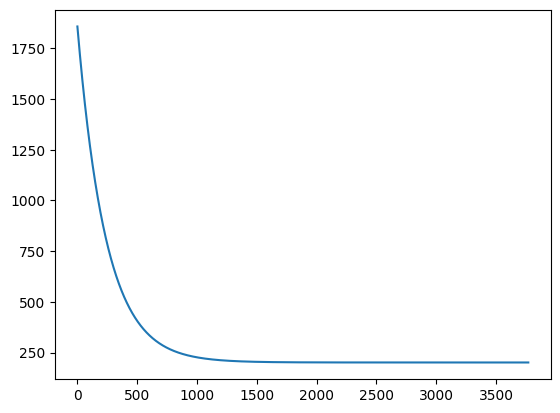

In [166]:
# plot errors
plt.plot(lr.errors)
plt.show()

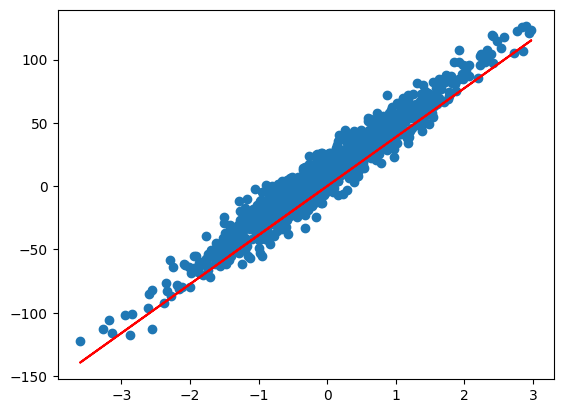

In [167]:
# prompt: plot the x data and the slope of linear regression line fit

import matplotlib.pyplot as plt

plt.scatter(X, y)
plt.plot(X, np.dot(X, lr.coeffs), color='red')
plt.show()
